# Machine Learning Supervised Learning
## Hands-on Assignment

### Curated by - Paritosh

- ## Answer 1

Question 1
Visualizing Pairwise Fisher Discriminant
- Dataset: https://www.kaggle.com/c/digit-recognizer
- For every pair of classes (0, 1), (0, 9), ..., (8, 9)
- Compute the Fisher Discriminant of each pixel (feature)
o Note that some of the pixels might have a zero denominator
o Treat that as 0 Fisher
- Normalize the remaining Fisher discriminant values from 0 to 1
- Draw the Fisher images of each of the pairs of classes
- See how they make sense (e.g. Class (0, 1), (3, 5), (4, 6)).
- This is “feature wise” Fisher goodness of each dimension

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

### Deriving Insights from the data

In [2]:
# Loading the dataset
data = pd.read_csv('train.csv')
print(data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# Data Summary
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean 

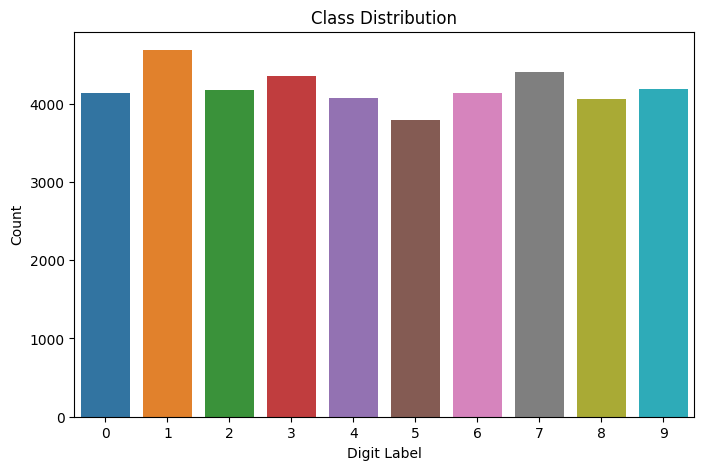

In [4]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

In [6]:
# Checking if there is any Missing Values 
print(data.isnull().sum())

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [7]:
# Data Integrity (Check for duplicates)
print(data.duplicated().sum())

0


- ## Inferences from the dataset after EDA

- RangeIndex: 42000 entries
- Columns: 785 entries, label to pixel783
- Datatypes: int64(785)
- Sample data is almost equally present in the dataset 
- No missing values
- No duplicates present


In [8]:
# Separate features and labels from the dataset
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print(features)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


### Normalize the Fisher discriminant values from 0 to 1 using StandardScaler

In [9]:
#Using StandardScaler to scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(scaled_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
# Define the pairs of classes from the dataset 
class_pairs = [(i, j) for i in range(9) for j in range(i + 1, 10)]
print(class_pairs)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


- ## Pairs formed are

(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9),

(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9),

(2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9),

(3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9),

(4, 5), (4, 6), (4, 7), (4, 8), (4, 9),

(5, 6), (5, 7), (5, 8), (5, 9),

(6, 7), (6, 8), (6, 9),

(7, 8), (7, 9),

(8, 9)

In [11]:
# Assigning a color for different classes
colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

### Some of the pixels have a zero denominator so treating them for 0 Fisher

In [12]:
# Defining a standard epsilon value to avoid division by zero for Fisher 
epsilon = 1e-8

In [13]:
# Creating an empty DataFrame to store the Fisher features and labels for all class pairs
fisher_values_all = pd.DataFrame()

## After applying Fisher discriminant on normalised data 
 ## Draw the Fisher images of each of the pairs of classes 

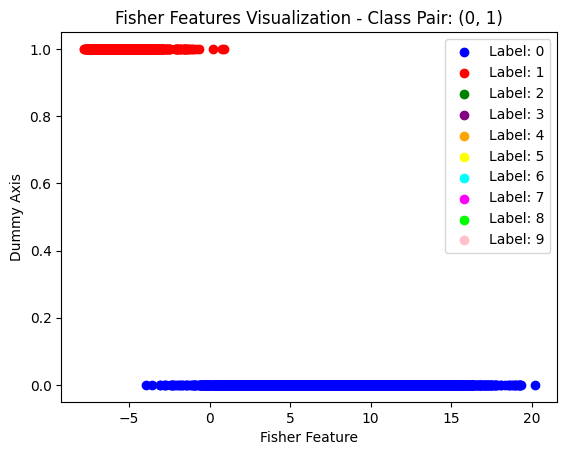

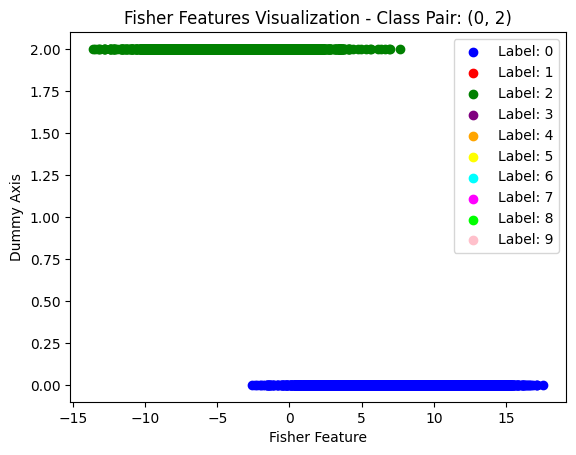

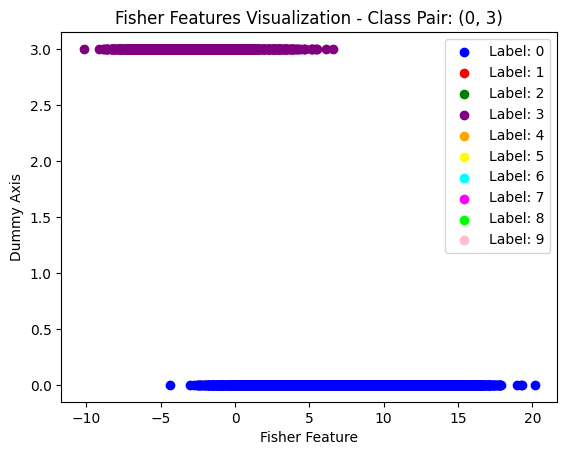

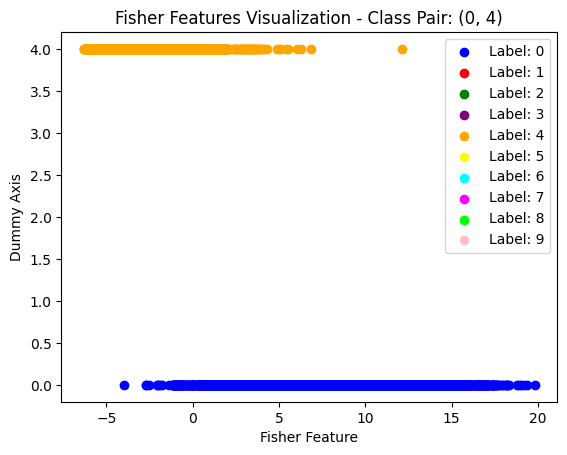

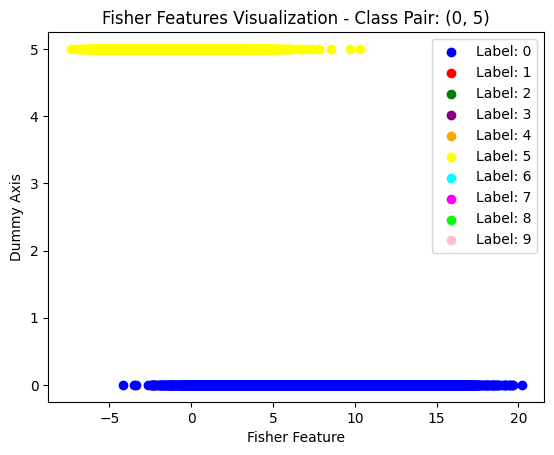

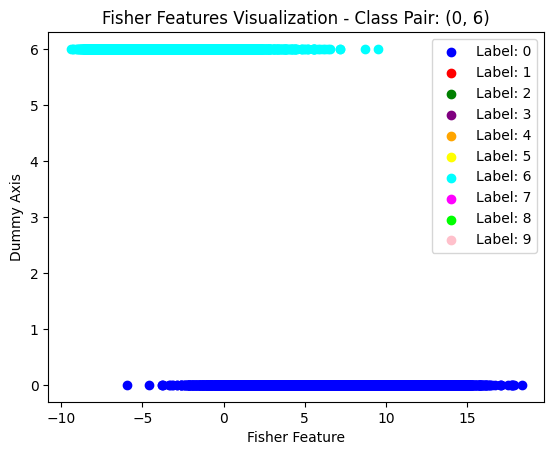

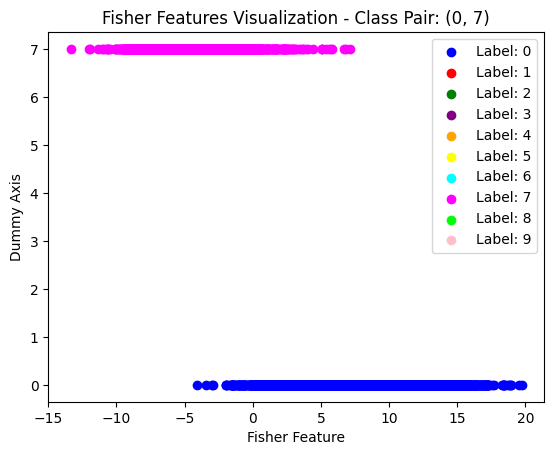

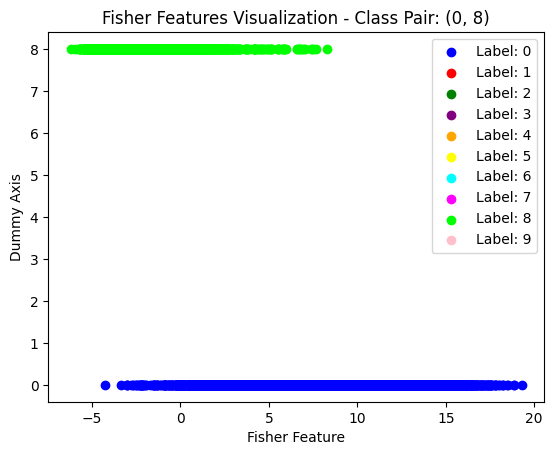

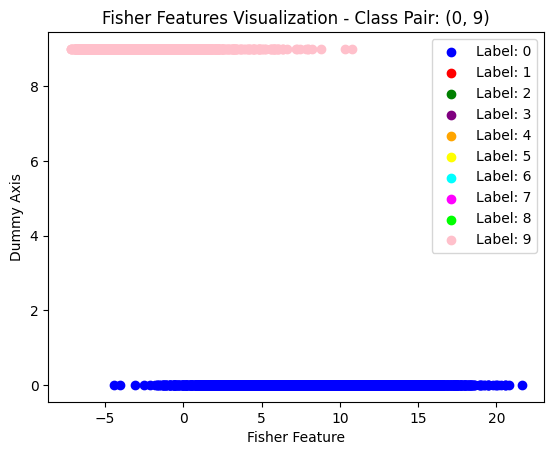

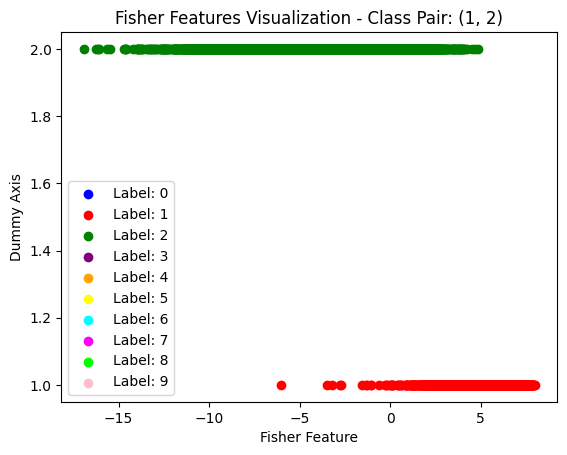

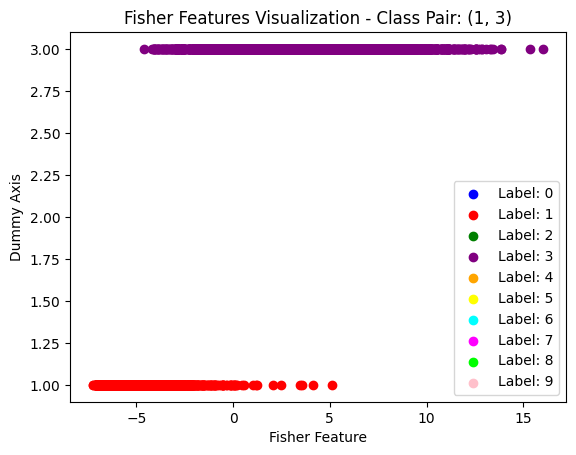

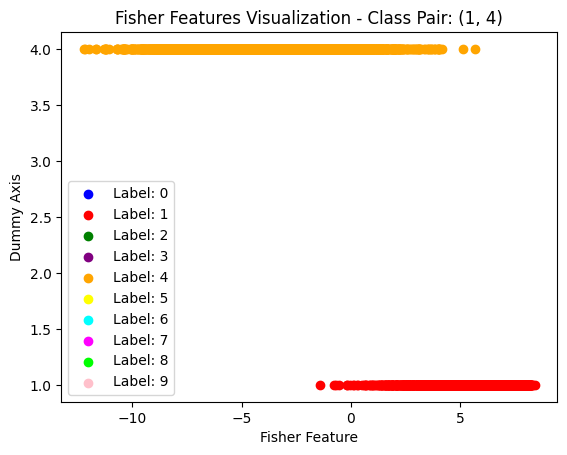

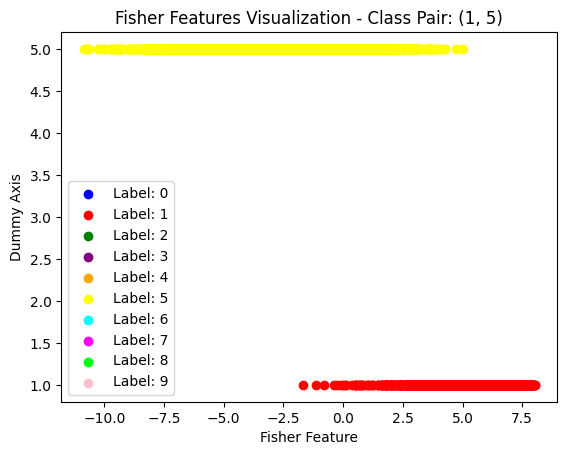

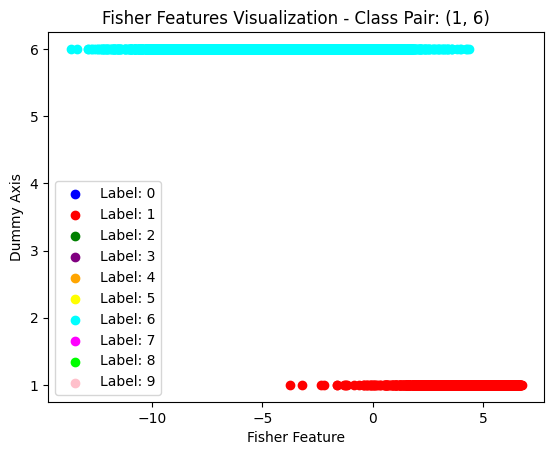

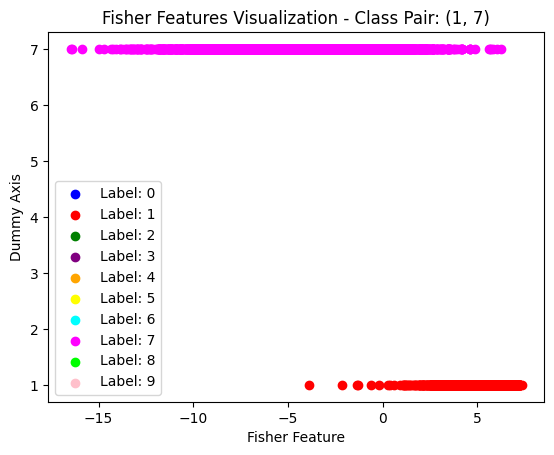

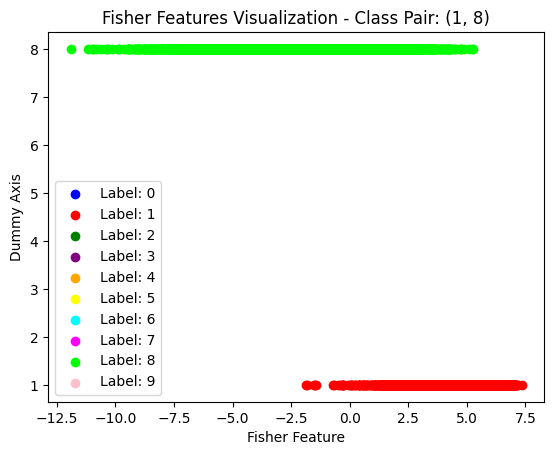

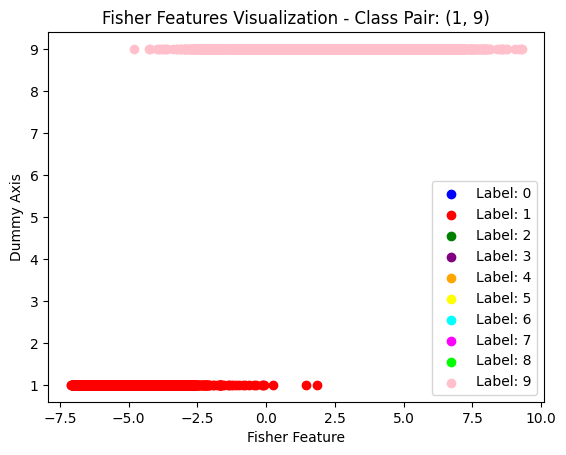

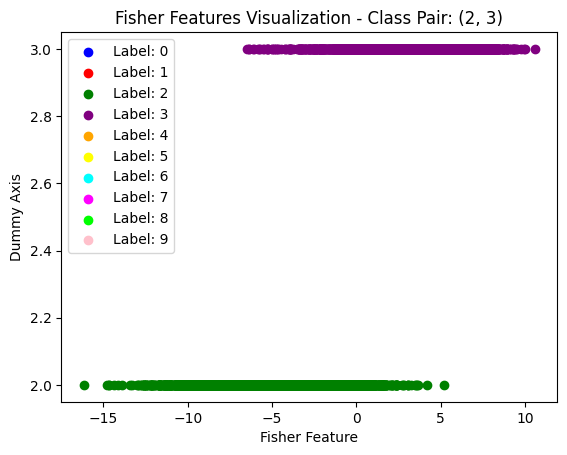

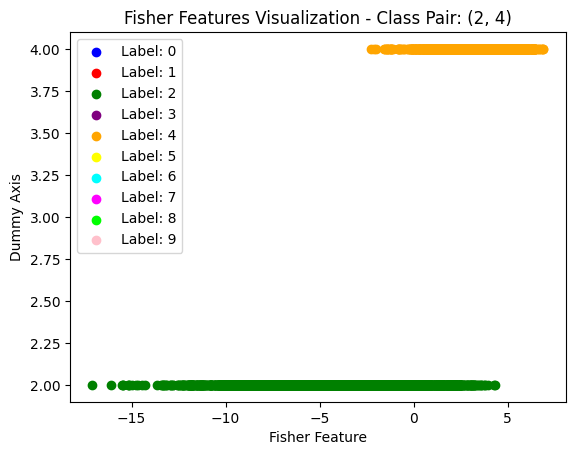

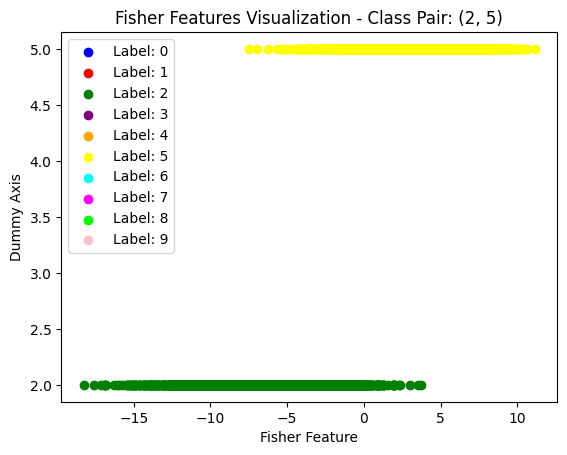

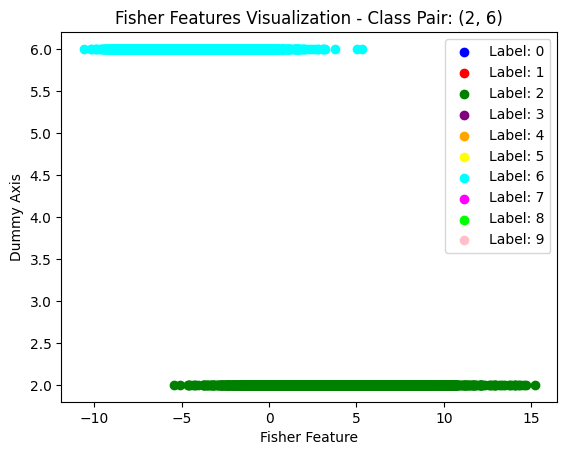

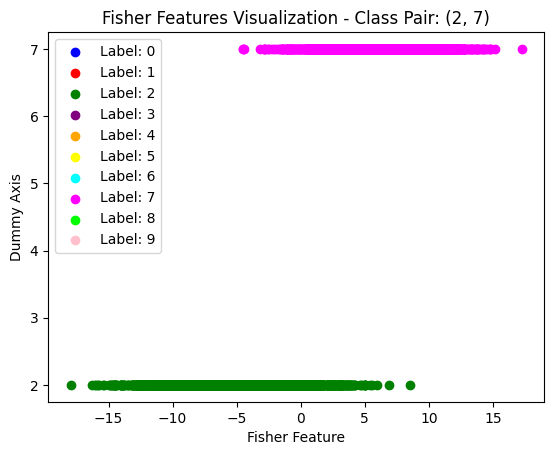

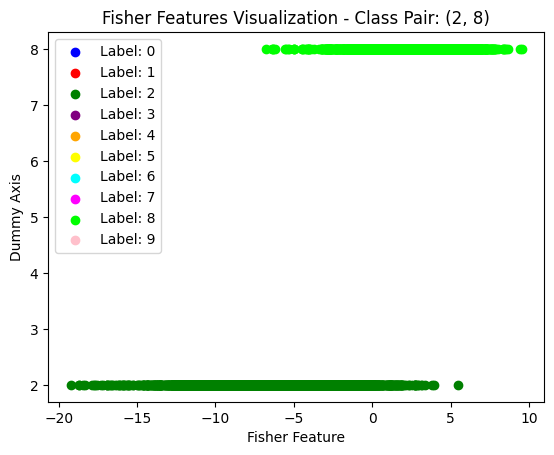

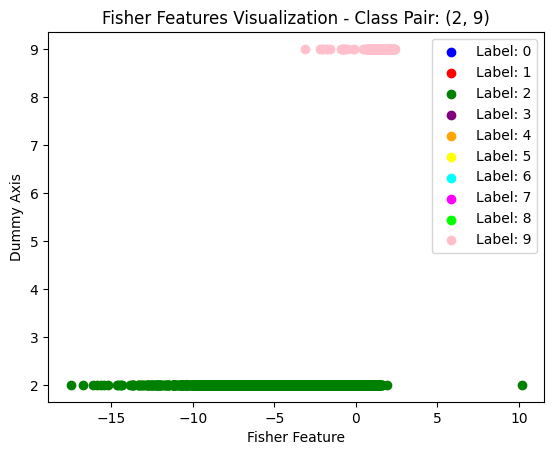

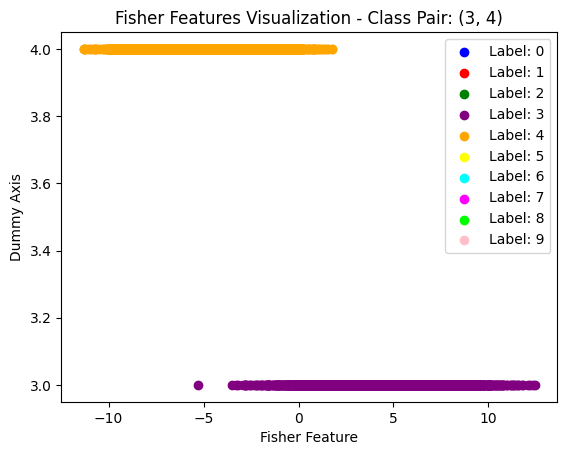

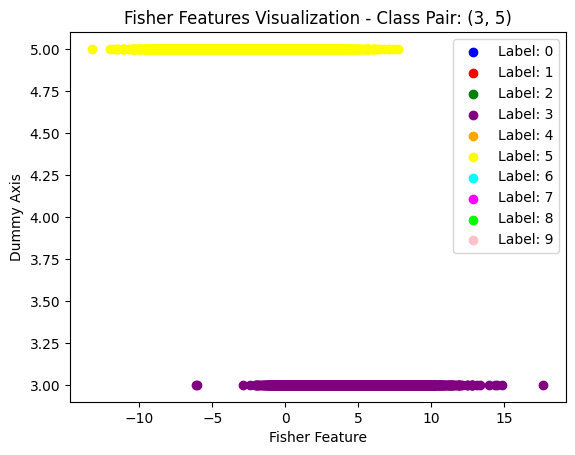

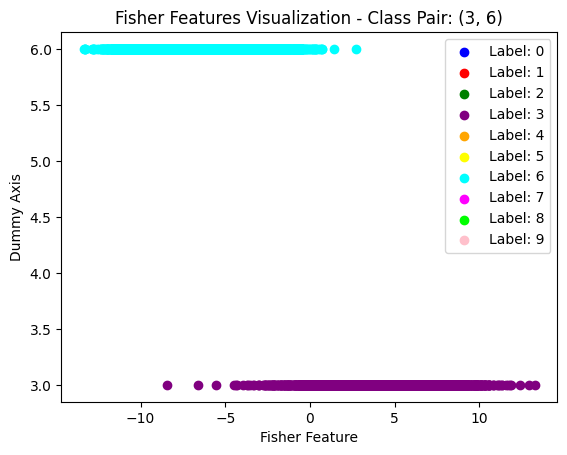

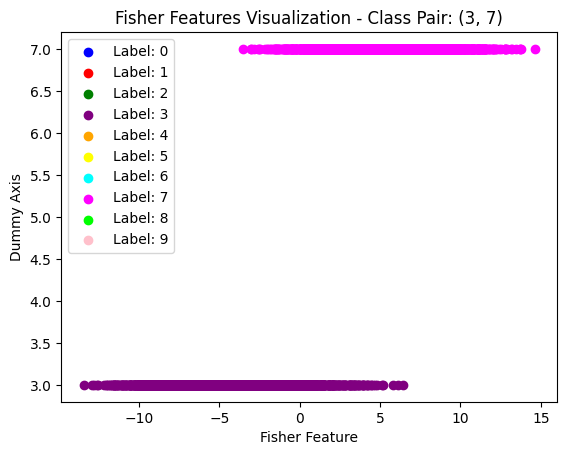

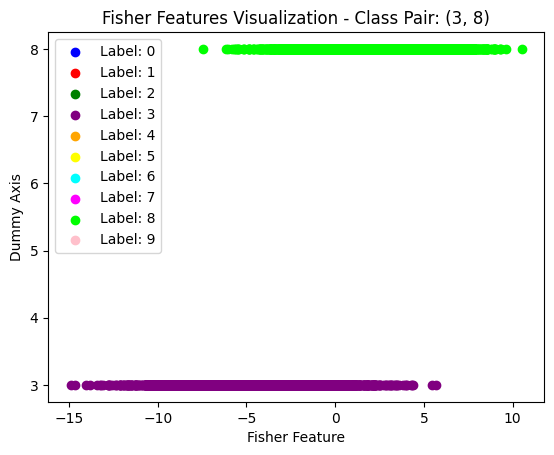

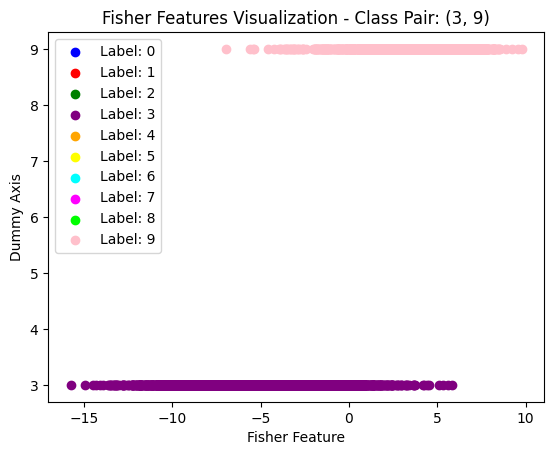

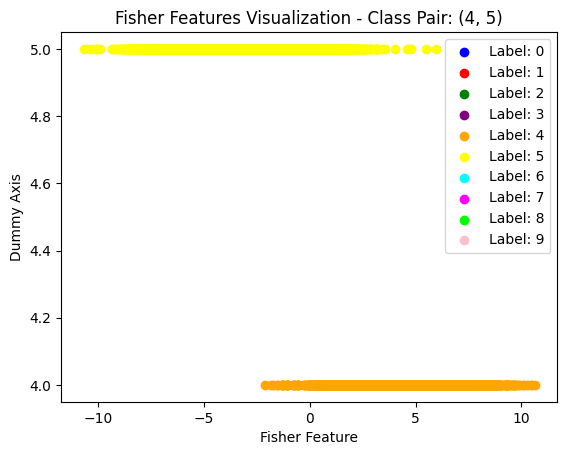

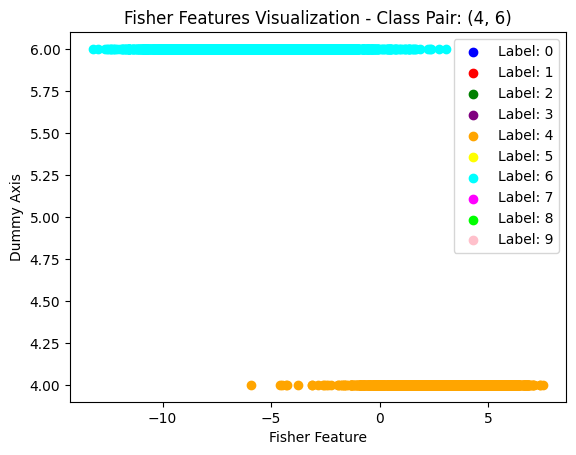

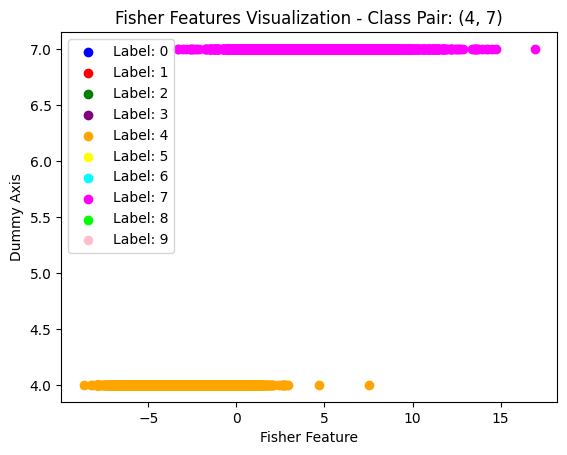

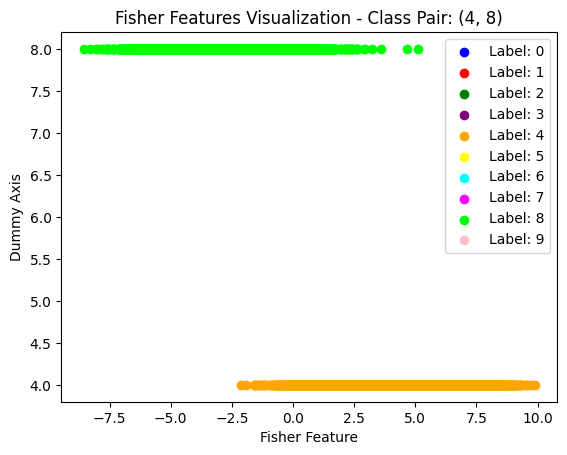

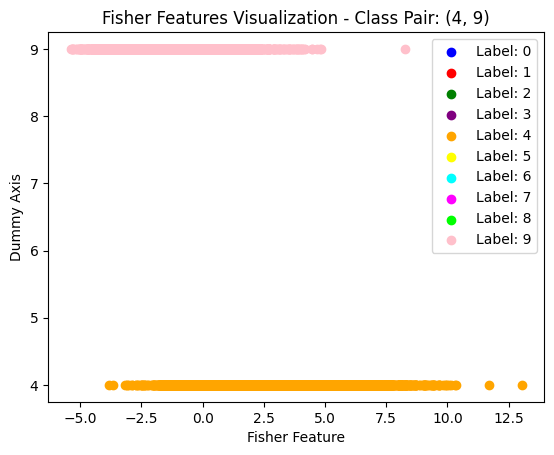

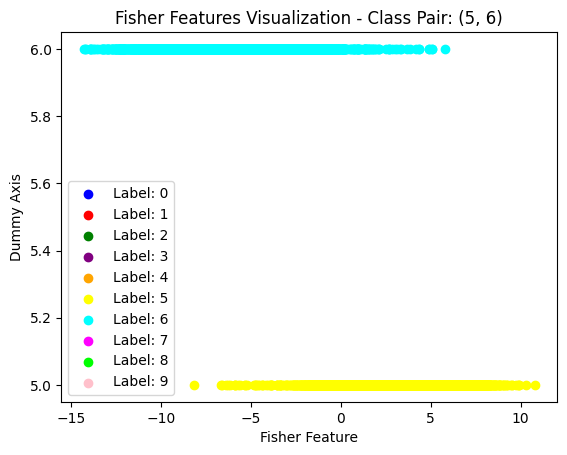

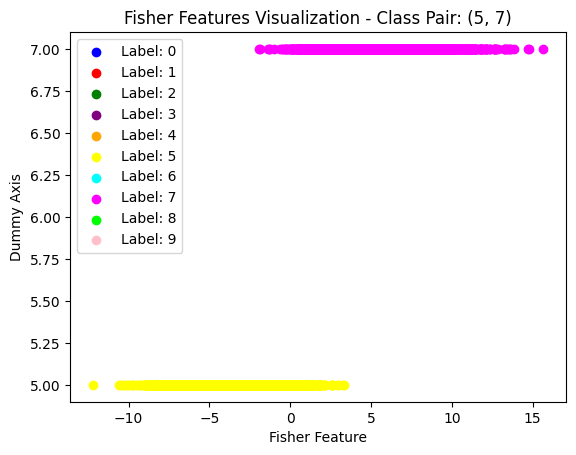

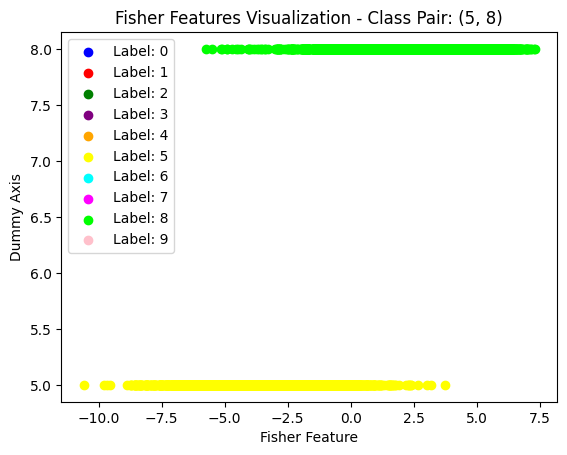

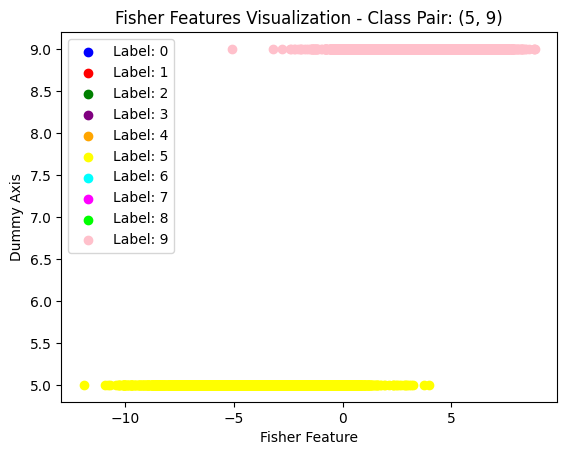

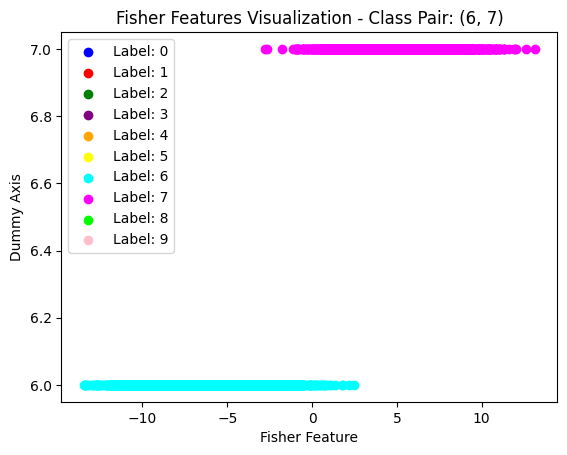

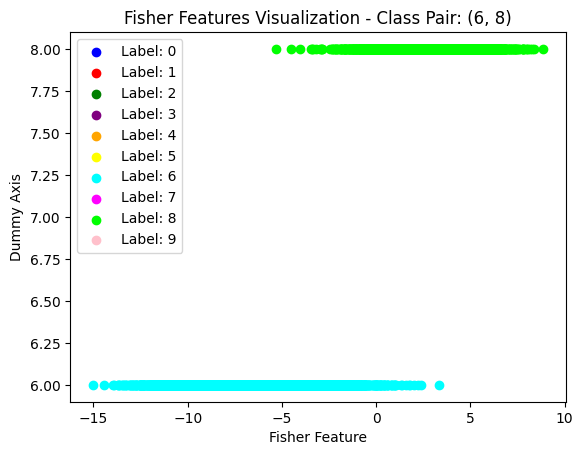

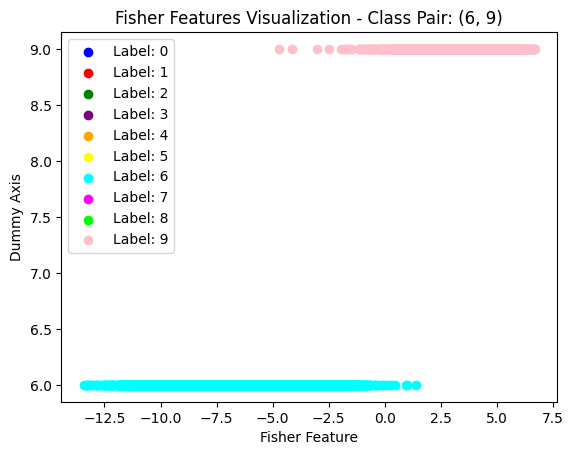

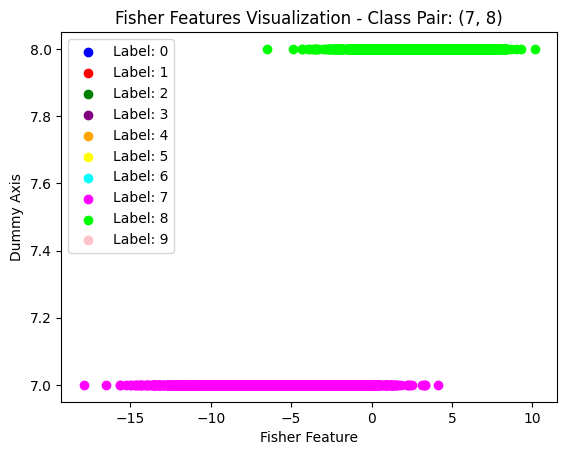

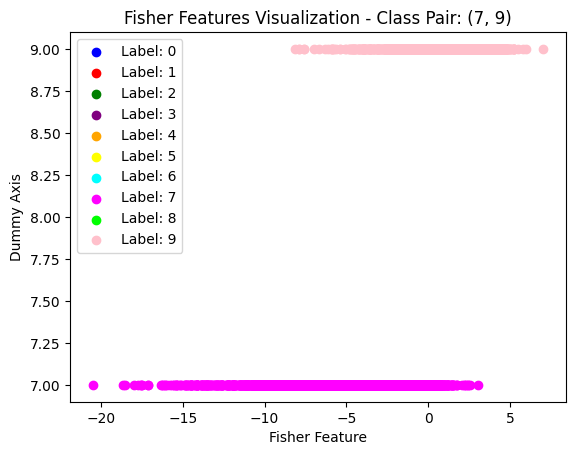

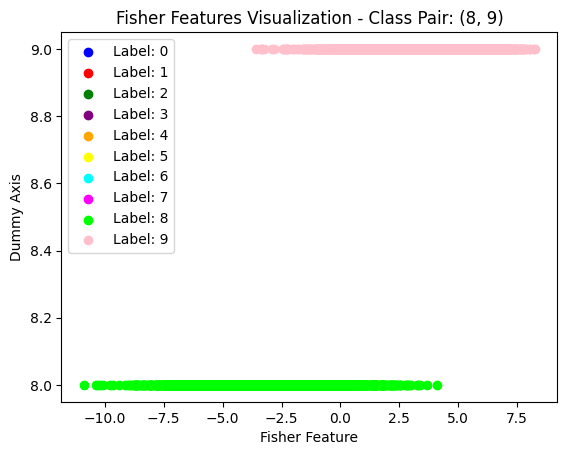

In [14]:
for idx, class_pair in enumerate(class_pairs):
    # Extract the indices corresponding to the two classes
    class_indices = np.where(np.logical_or(labels == class_pair[0], labels == class_pair[1]))[0]

    # Create subsets of features and labels for the class pair
    class_features = scaled_features[class_indices]
    class_labels = labels[class_indices]

    # Calculate class means for each class subset
    mean1 = np.mean(class_features[class_labels == class_pair[0]], axis=0)
    mean2 = np.mean(class_features[class_labels == class_pair[1]], axis=0)

    # Calculate the within-class scatter matrix (Sw)
    cov1 = np.cov(class_features[class_labels == class_pair[0]], rowvar=False)
    cov2 = np.cov(class_features[class_labels == class_pair[1]], rowvar=False)
    Sw = cov1 + cov2

    # Calculate the between-class scatter matrix (Sb)
    Sb = np.outer(mean1 - mean2, mean1 - mean2)

    # Calculate the Fisher Discriminant matrix (W)
    eigenvalues, eigenvectors = eigh(np.linalg.pinv(Sw).dot(Sb))
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    W = eigenvectors[:, sorted_indices[:1]]  # Choose the top discriminant vector

    # Project the data onto the Fisher Discriminant vector
    # Adding epsilon to avoid division by zero for pixels with zero Fisher Discriminant
    fisher_features = class_features.dot(W) / (np.linalg.norm(W) + epsilon)

    # Assign the Fisher features back to their respective labels
    if idx == 0:
        fisher_values = np.hstack((fisher_features, class_labels.reshape(-1, 1)))
    else:
        fisher_values = np.vstack((fisher_values, np.hstack((fisher_features, class_labels.reshape(-1, 1)))))

    for label_value, color in zip(range(10), colors):
        plt.scatter(fisher_features[class_labels == label_value], np.zeros_like(fisher_features[class_labels == label_value])+label_value, color=color, label=f"Label: {label_value}")
    # Add legend and labels
    plt.legend()
    plt.xlabel("Fisher Feature")
    plt.ylabel("Dummy Axis")
    plt.title(f"Fisher Features Visualization - Class Pair: {class_pair}")
    plt.show()


##### Analysis of the pair by comparing every pixel of numbers and plotting them by superimposing both digits on one another.

(0, 1)


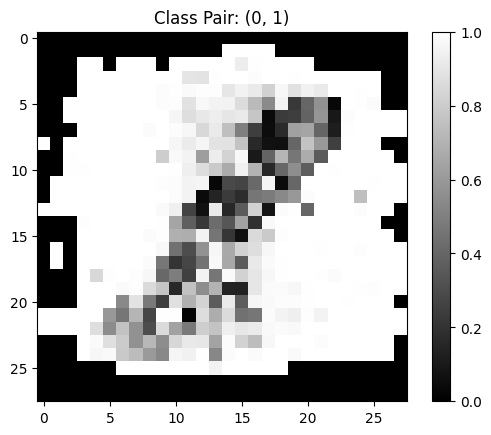

(0, 2)


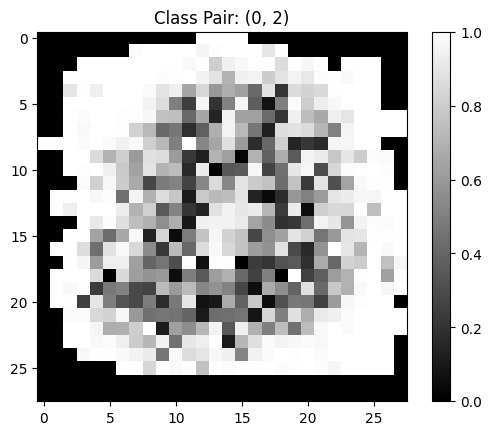

(0, 3)


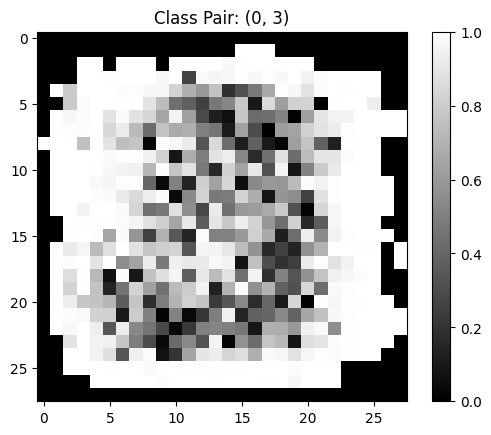

(0, 4)


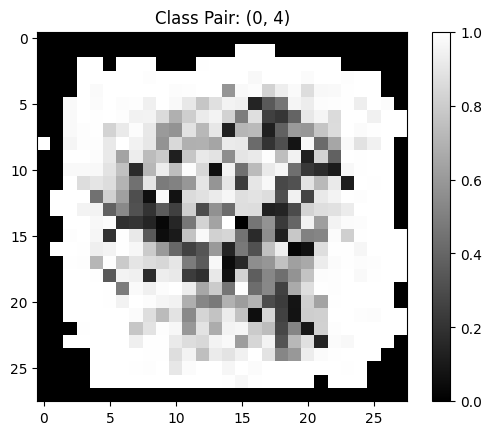

(0, 5)


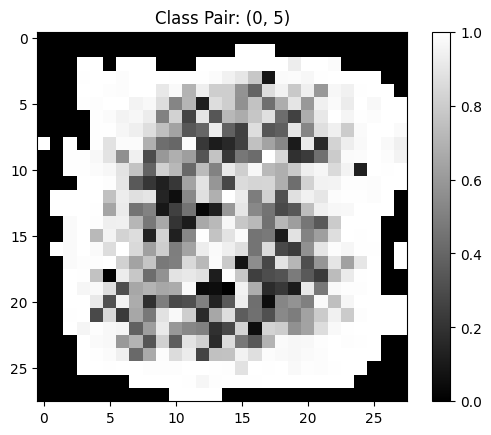

(0, 6)


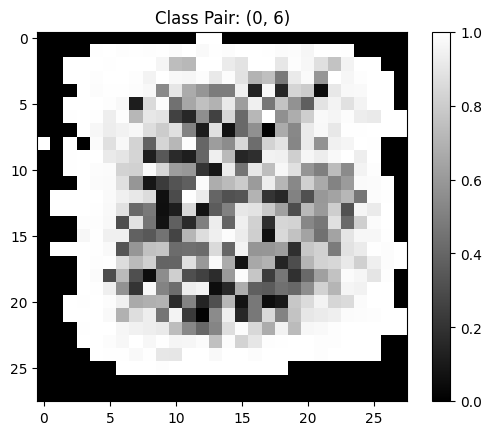

(0, 7)


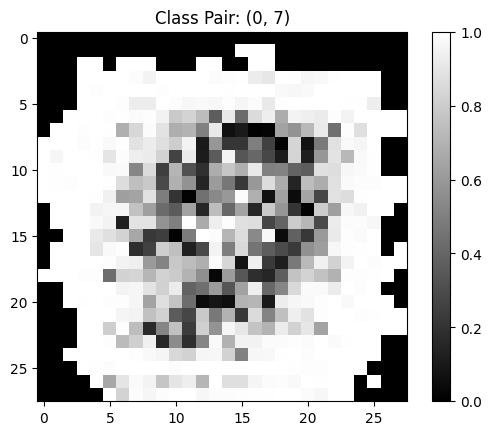

(0, 8)


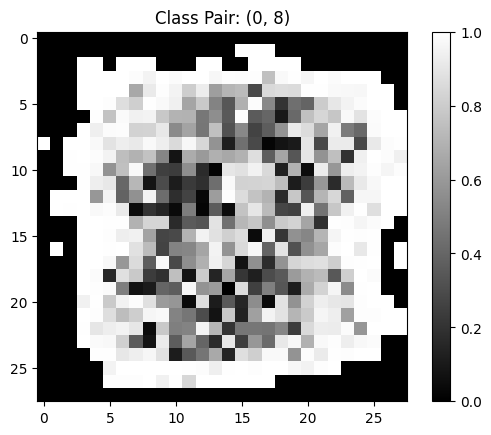

(0, 9)


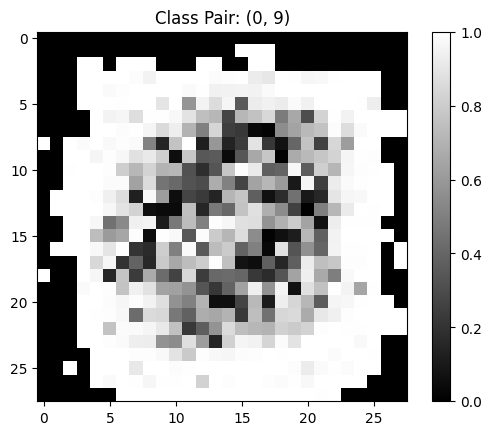

(1, 2)


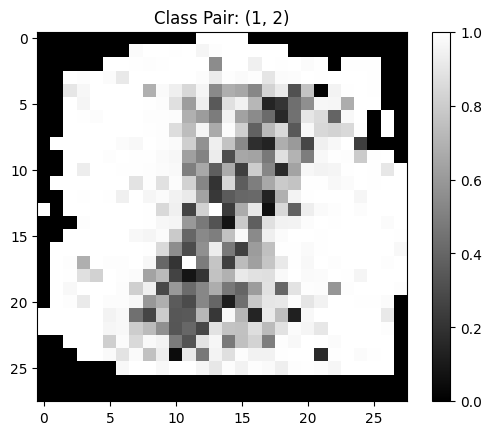

(1, 3)


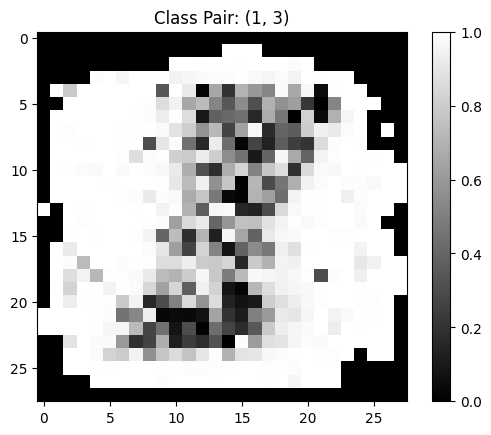

(1, 4)


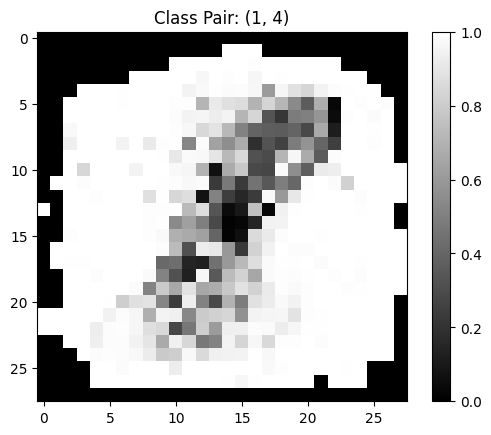

(1, 5)


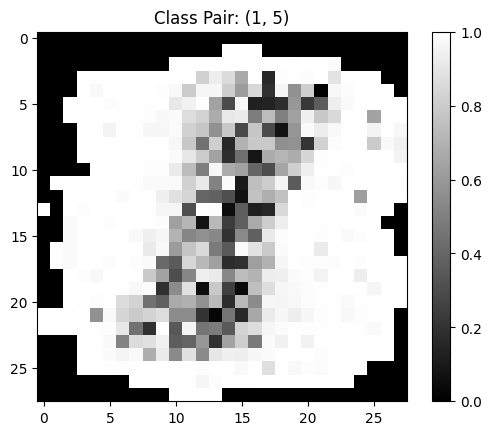

(1, 6)


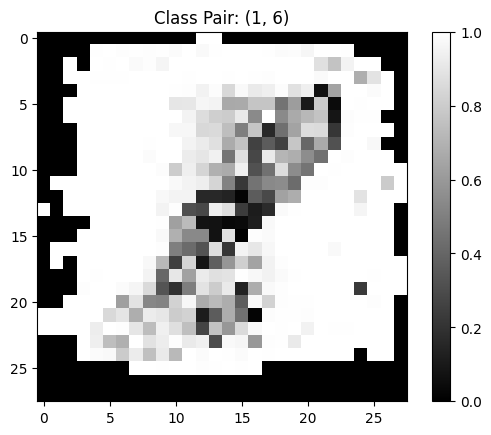

(1, 7)


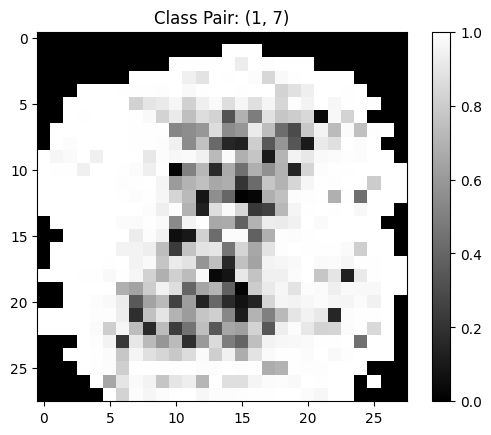

(1, 8)


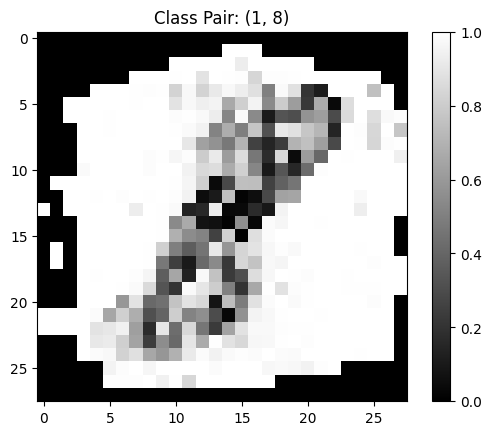

(1, 9)


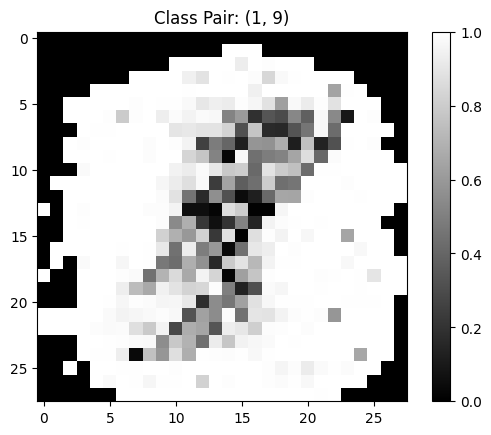

(2, 3)


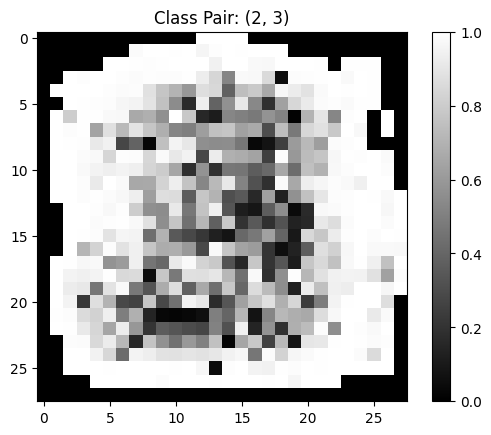

(2, 4)


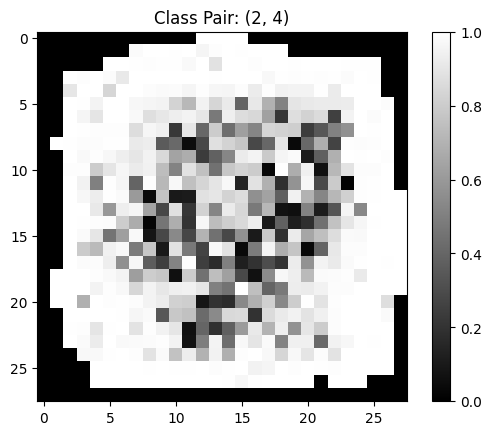

(2, 5)


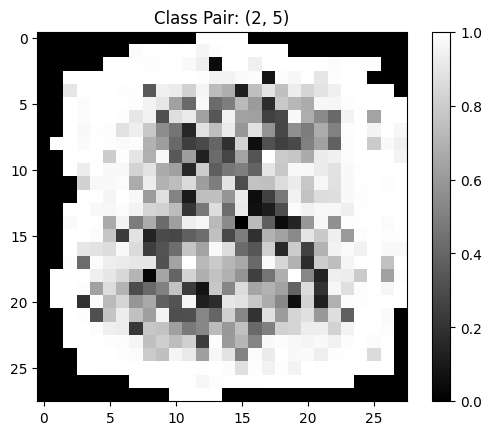

(2, 6)


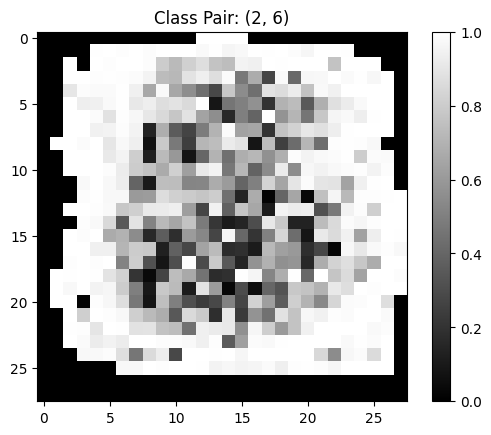

(2, 7)


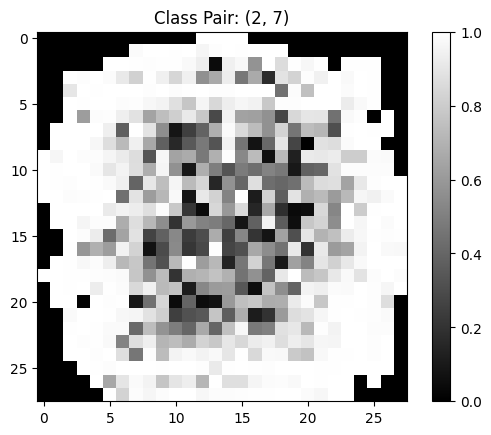

(2, 8)


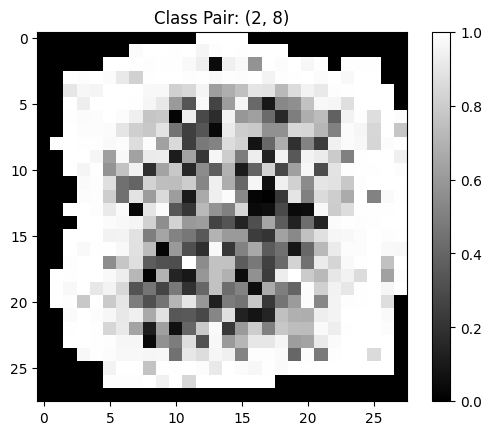

(2, 9)


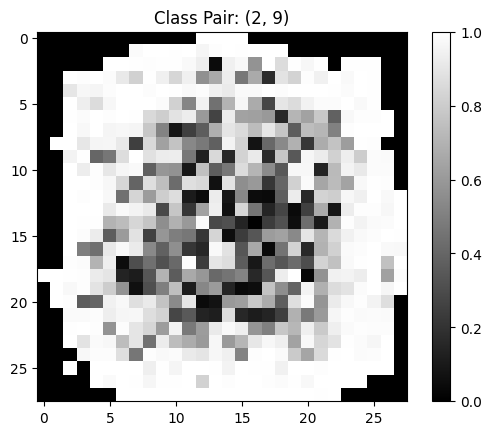

(3, 4)


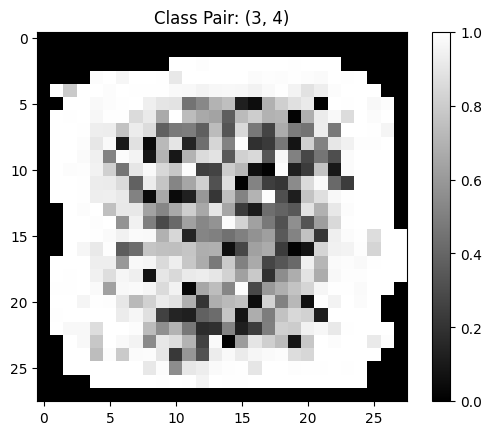

(3, 5)


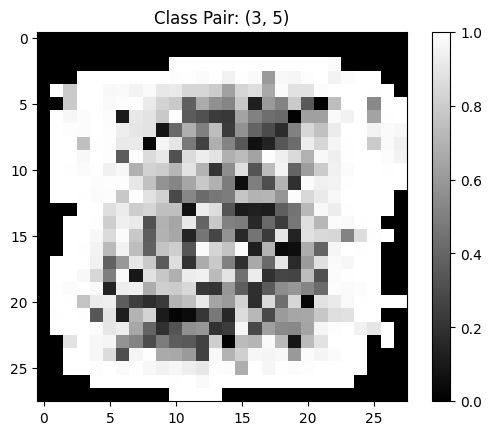

(3, 6)


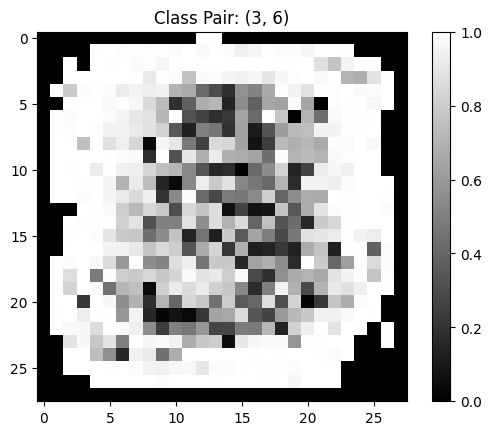

(3, 7)


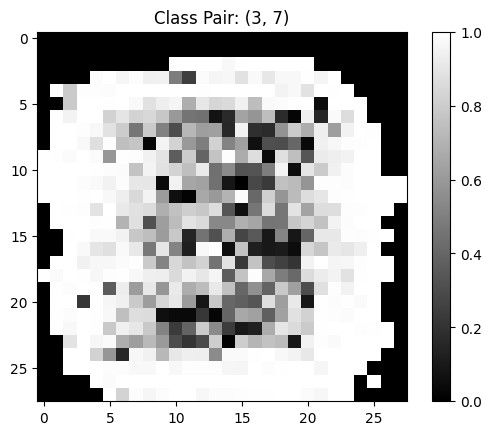

(3, 8)


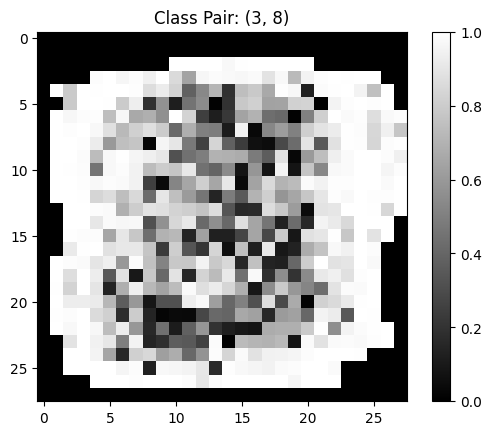

(3, 9)


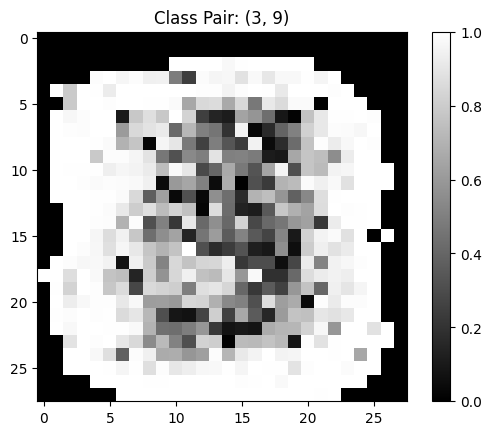

(4, 5)


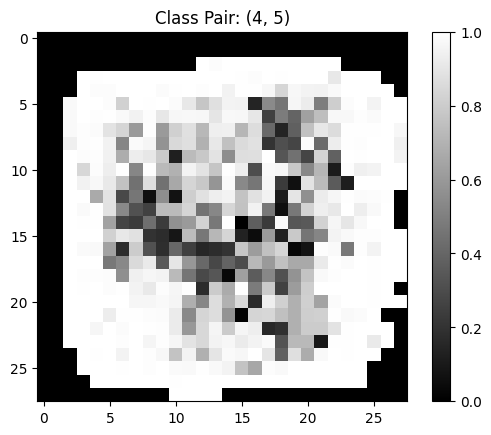

(4, 6)


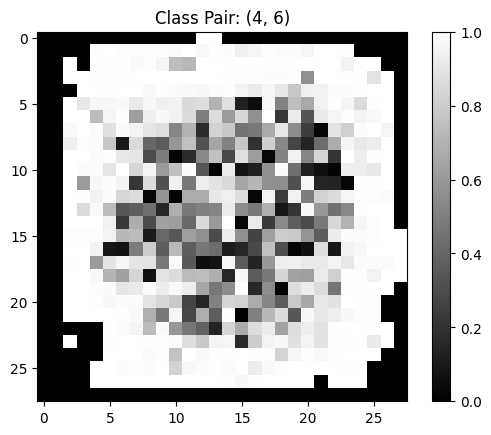

(4, 7)


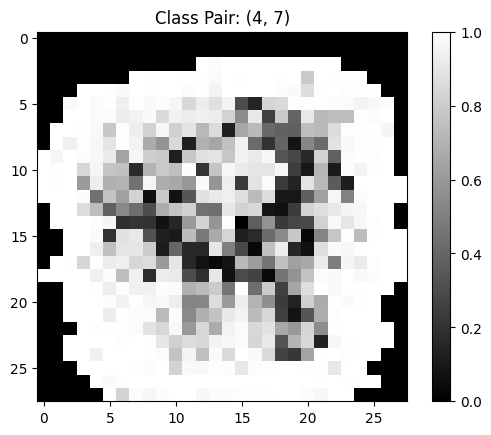

(4, 8)


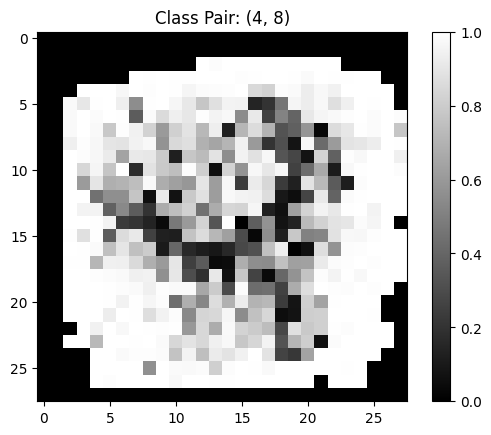

(4, 9)


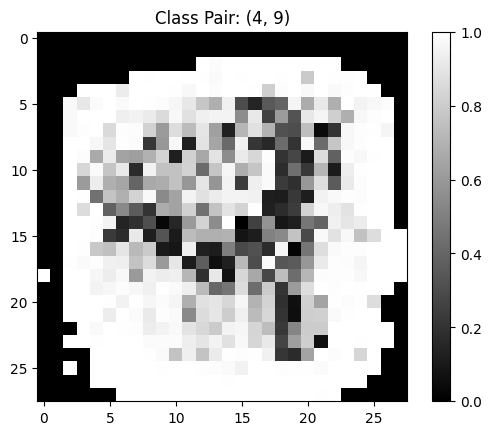

(5, 6)


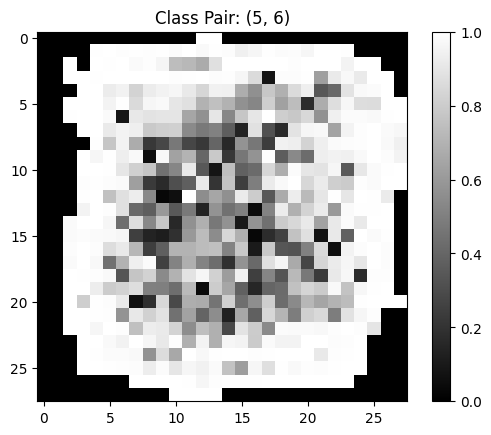

(5, 7)


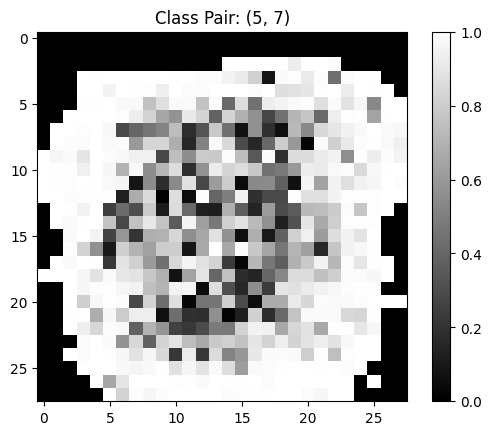

(5, 8)


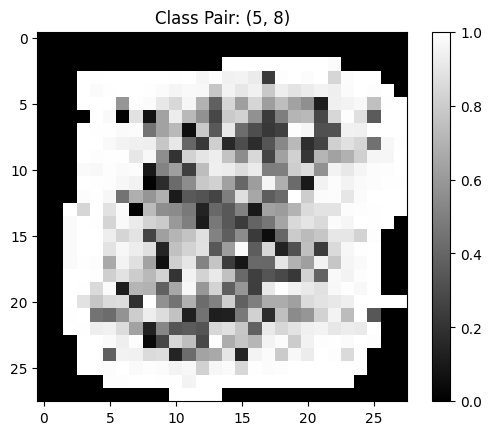

(5, 9)


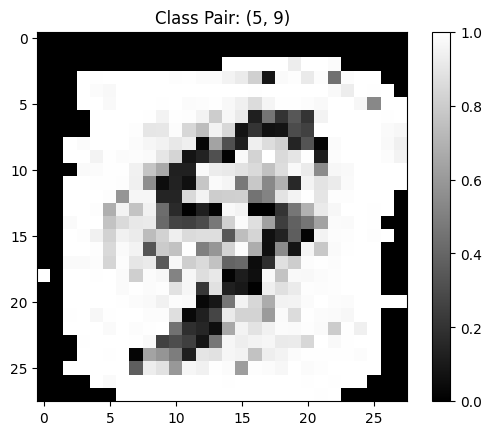

(6, 7)


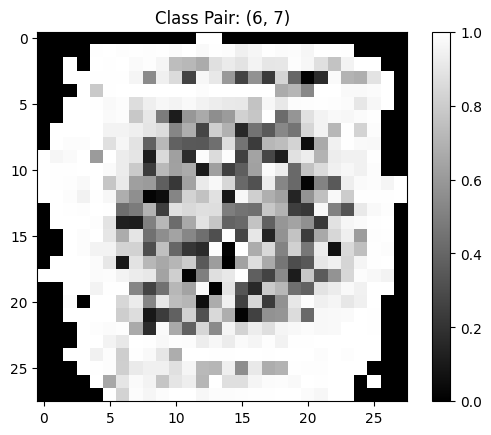

(6, 8)


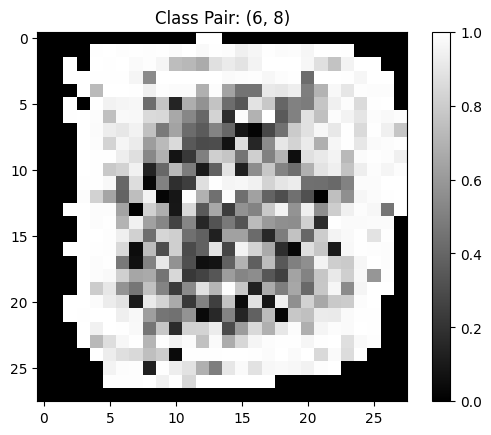

(6, 9)


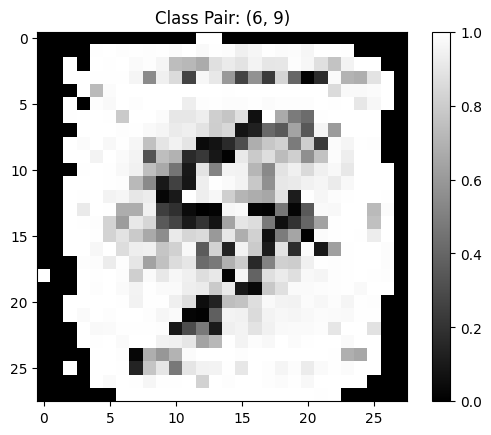

(7, 8)


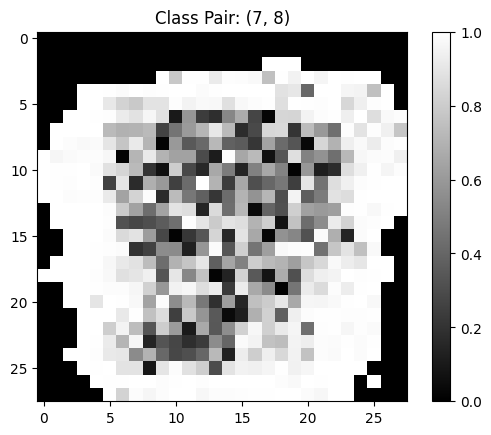

(7, 9)


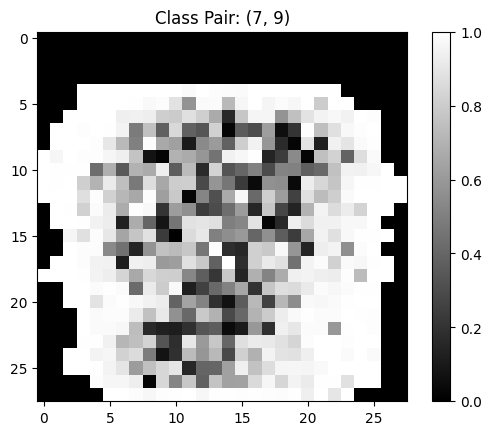

(8, 9)


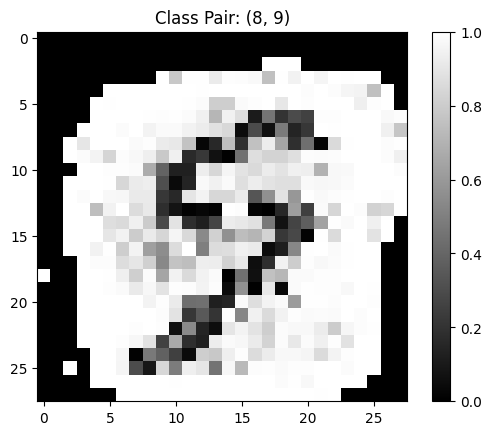

In [15]:

# Iterate over each pair of classes
for idx, class_pair in enumerate(class_pairs):
    # Extract the indices corresponding to the two classes
    print(class_pair)
    class_indices = np.where(np.logical_or(labels == class_pair[0], labels == class_pair[1]))[0]
    
    # Create subsets of features and labels for the class pair
    class_features = features[class_indices]
#     print(np.shape(class_features))
    class_labels = labels[class_indices]
#     print(np.shape(class_labels))
    
    # Calculate class means for each class subset
    mean1 = np.mean(class_features[class_labels == class_pair[0]], axis=0)
    mean2 = np.mean(class_features[class_labels == class_pair[1]], axis=0)

    # Calculate class covariances for each class subset
    cov1 = np.cov(class_features[class_labels == class_pair[0]], rowvar=False)
    cov2 = np.cov(class_features[class_labels == class_pair[1]], rowvar=False)
    
    # Calculate the Fisher Discriminant for each pixel
    fisher = np.square(mean1 - mean2) / (cov1 + cov2)
    fisher = np.nan_to_num(fisher, nan=0, posinf=0, neginf=0)
    
#     print("=====Fisher======")
#     print(fisher)
    
    # Normalize the Fisher discriminant values for each feature
    fisher_normalized = np.nan_to_num((fisher - np.min(fisher, axis=0)) / (np.max(fisher, axis=0) - np.min(fisher, axis=0)))
#     print("=====Fisher_Normalized======")
#     print(fisher_normalized)
    
    fisher_image = fisher_normalized[0].reshape(28, 28)  # Reshape to the original image size
    
    # Convert the Fisher image to a DataFrame
    fisher_df = pd.DataFrame(fisher_image)

    # Write the DataFrame to a CSV file
    file_path = f"fisher_image_{class_pair}.csv"
    fisher_df.to_csv(file_path, index=False)

    # Plot the Fisher image
    plt.imshow(fisher_image, cmap='gray', vmin=0, vmax=1)
    plt.title(f"Class Pair: {class_pair}")
    plt.colorbar()
    plt.show()


## Insights dervied from the plots of the Fisher Discriminant

### Some example observations for the pair of digits-


- #### 0 and 1: The Fisher discriminant values for 0 and 1 are well separated in most cases. This is because the two digits have very different shapes. 0 is a round digit, while 1 is a tall digit. The Fisher discriminant is able to capture this difference in shape and have fewer misclassification.

- #### 3 and 5 : The Fisher discriminant values for 3 and 5 are well separated in most cases. This is because the two digits have very different shapes. 3 and 5 can be recognised properly as their top openings are on opposite directions. The Fisher discriminant is able to capture this difference in shape and have fewer misclassification which as obeserved due to the overlap in opening of the digits being dame in the bottam part .

- #### 2 and 3: The Fisher discriminant values for 2 and 3 are also well separated in most cases. This is because the two digits have different features, such as the number of loops and the position of the top loop.

- #### 0 and 9: The Fisher discriminant values for 0 and 9 are well separated as the other digit pairs. This is because the two digits have similar shapes. However, the Fisher discriminant is still able to distinguish between the two digits in most cases.

- #### 4 and 6: The Fisher discriminant values for 4 and 6 are not as well separated as the other digit pairs. This is because the variation with which 4's are written so with respect to Fisher feature 4 is hugely overlapping 6. However, the Fisher discriminant might misclassify between the two digits.

- #### 8 and 9: The Fisher discriminant values for 8 and 9 are separated but their is a overlapping of fisher features. This is intuitive as well because the two digits have similar features, their are some 8's which might appear like 9. So there is a misclassification.

- ## Answer 2

Question 2
Parameter Sweep over Decision Trees
- Dataset: https://www.kaggle.com/uciml/mushroom-classification
- Divide it randomly into 65% training and 35% test data
- Build a Decision Tree classifier with the following hyper-parameter combinations:
- o (Im)PurityMeasure:Entropy
- o Maximum Depth:1, 2, 3, 4, 5, 6, 7 
- o PurityThreshold:0.6,0.7,0.8,0.9 
- o SizeThreshold:Verylow
- Create a 2-D Table (Depth vs. Purity) above values
- In each cell, write the “Training” and “Test” accuracy
- Make an observation about the best parameter combination
- Draw the decision tree using the tools available
- Write down the rules learnt by this decision tree

In [20]:
#Importing necessary libraries for this dataset 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score
import graphviz
import pydot
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('mushrooms.csv')
print(data)


     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

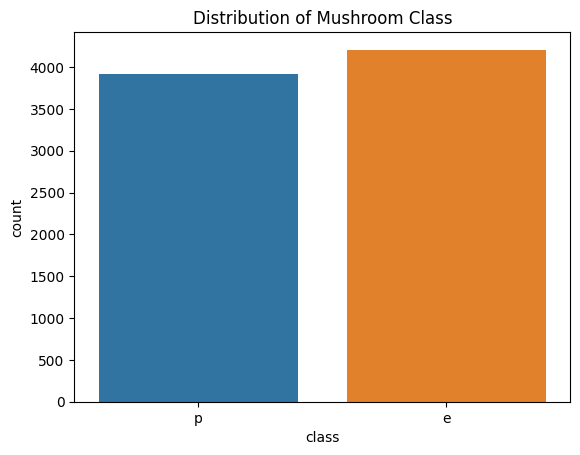

In [21]:

# Visualize the distribution of class (target variable)
sns.countplot(x='class', data=data)
plt.title('Distribution of Mushroom Class')
plt.show()


In [22]:
# Get summary statistics
summary_stats = data.describe()
print(summary_stats)

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

In [23]:
# Get value counts for each categorical column
for column in data.columns:
    if data[column].dtype == 'object':
        value_counts = data[column].value_counts()
        print(f'Value counts for {column}:\n{value_counts}\n')


Value counts for class:
e    4208
p    3916
Name: class, dtype: int64

Value counts for cap-shape:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Value counts for cap-surface:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Value counts for cap-color:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Value counts for bruises:
f    4748
t    3376
Name: bruises, dtype: int64

Value counts for odor:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Value counts for gill-attachment:
f    7914
a     210
Name: gill-attachment, dtype: int64

Value counts for gill-spacing:
c    6812
w    1312
Name: gill-spacing, dtype: int64

Value counts for gill-size:
b    5612
n    2512
Name: gill-size, dtype: int64

Value counts for gill-color:
b    1728
p    1492
w    1202
n    1048
g     752


In [24]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


- ## Inferences from the dataset after EDA

- RangeIndex: 8124 entries
- Columns: 23 Unique Features
- Datatypes: int64
- Sample data of two classes No of observations Edible(e)- 4028 and Poisonous(p)-3196
- No missing values
- All features are categorical features of the Mushroom classes

In [25]:
X = data.drop(columns=["class"], axis = 1)
y = data["class"]

### Spitting the dataset in Train - 65% Test - 35%

In [26]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


#### Function for Ordinal Encoding for the X Features for Train and Test data 

In [27]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

#### Function for Label Encoding for the Class label for Train and Test data 

In [28]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

#### Function for Feature Selection of the Data
- #### To Select the best feature, finding the Goodness of a feature with the help of Chi-Square test on each feature
- #### Hypothesis Test for Chi-Square Goodness of Fit:
- #### H₀: The null hypothesis states that there is no significant relationship between the feature and the target variable. It assumes that any observed association is due to random chance.
- #### H₁: The alternative hypothesis states that there is a significant relationship between the feature and the target variable. It suggests that the observed association is not due to random chance and reflects a true relationship.
- #### P-value: Small - We reject the null hypothesis and conclude that there is a significant relationship between the feature and the target variable. 
- #### P-value: Large -  We fail to reject the null hypothesis, indicating that there is insufficient evidence to claim a significant relationship between the feature and the target variable.

In [29]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [30]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [31]:
chi2_scores = fs.scores_
p_values = fs.pvalues_

# Print the scores and p-values for each feature
print("Feature Importance Scores and P-Values:")
for i, (feature_name, score, p_value) in enumerate(zip(X_train.columns, chi2_scores, p_values)):
    print(f"Feature {i}: {feature_name}: Score: {score}, P-Value: {p_value}")


Feature Importance Scores and P-Values:
Feature 0: cap-shape: Score: 9.711366105250573, P-Value: 0.001831318318224754
Feature 1: cap-surface: Score: 141.82567996906582, P-Value: 1.0616895459727898e-32
Feature 2: cap-color: Score: 5.070179659263042, P-Value: 0.024340860778149606
Feature 3: bruises: Score: 803.3438490786097, P-Value: 1.0116959836333559e-176
Feature 4: odor: Score: 53.7179884217406, P-Value: 2.314345269293311e-13
Feature 5: gill-attachment: Score: 2.308494288061226, P-Value: 0.12866863627288935
Feature 6: gill-spacing: Score: 525.1183145149148, P-Value: 3.258330760372965e-116
Feature 7: gill-size: Score: 1092.019481262711, P-Value: 1.792299793334469e-239
Feature 8: gill-color: Score: 4027.4737706827955, P-Value: 0.0
Feature 9: stalk-shape: Score: 22.74612602196407, P-Value: 1.8487645928759732e-06
Feature 10: stalk-root: Score: 771.4919081156924, P-Value: 8.51871314964606e-170
Feature 11: stalk-surface-above-ring: Score: 144.79467347170456, P-Value: 2.3815003104071464e-33


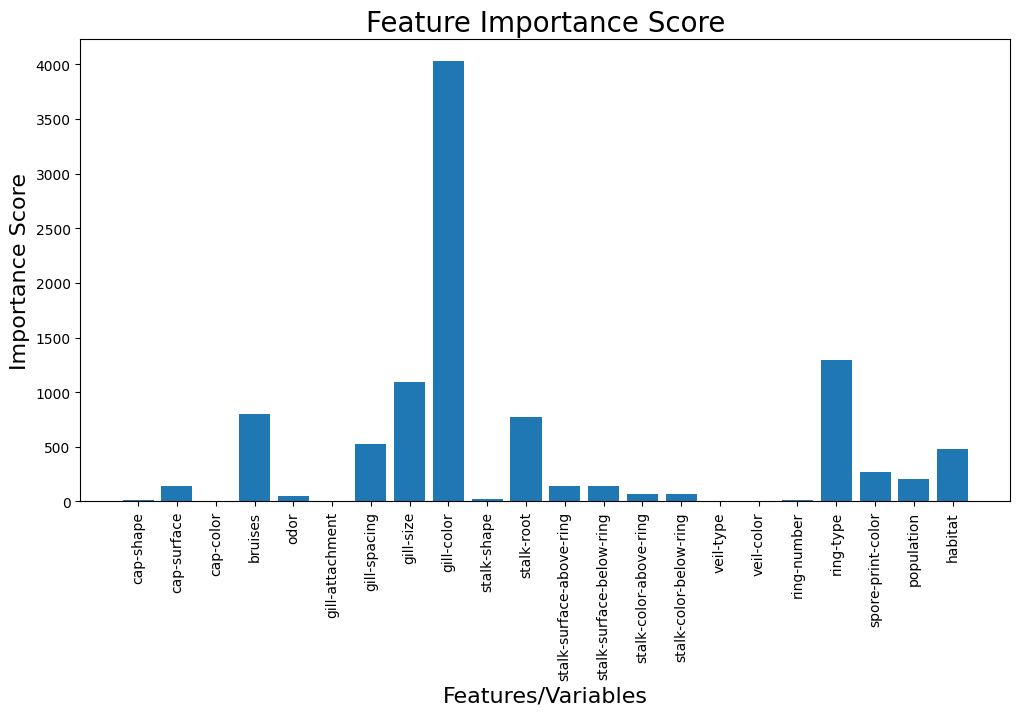

In [32]:
# plot the scores
plt.figure(figsize=(12, 6))
plt.bar(X_train.columns, fs.scores_)
plt.title("Feature Importance Score", size=20)
plt.xlabel("Features/Variables", size=16, color="black")
plt.ylabel("Importance Score", size=16, color="black")
plt.xticks(rotation=90)
plt.show()


In [33]:
# Get the feature indices to keep based on the threshold
selected_feature_indices = fs.scores_ > 143
print(selected_feature_indices)
# Get the column names of the selected features
selected_features = X_train.columns[selected_feature_indices]

# Drop the non-selected features from the training and test sets
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

print("Selected Features:")
print(selected_features)

[False False False  True False False  True  True  True False  True  True
 False False False False False False  True  True  True  True]
Selected Features:
Index(['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')


In [34]:
# Create a DataFrame to store feature importances, scores, and p-values
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Score': chi2_scores, 'P-Value': p_values})

# Sort the features based on p-values in ascending order
sorted_features = feature_importance_df.sort_values(by='P-Value')

# Set the threshold for p-values (e.g., 0.05)
threshold_p_value = 0.05

# Filter the features based on the threshold
selected_features = sorted_features[sorted_features['P-Value'] < threshold_p_value].head(10)

# Get the names of the selected features
selected_feature_names = selected_features['Feature'].tolist()
print(selected_feature_names)


['gill-color', 'ring-type', 'gill-size', 'bruises', 'stalk-root', 'gill-spacing', 'habitat', 'spore-print-color', 'population', 'stalk-surface-above-ring']


### After Analysing the result of Chi-Square test  we are considering the following features for classification
- bruises
- gill-spacing
- gill-size
- gill-color
- stalk-root
- stalk-surface-above-ring
- ring-type
- spore-print-color
- population
- habitat

In [35]:
#Now forming the subset dataframe out of the selected feature
selected_feature_names.append('class')
print(selected_feature_names)
# Create the new subset DataFrame with selected columns
subset_data = data[selected_feature_names].copy()
print(subset_data)


['gill-color', 'ring-type', 'gill-size', 'bruises', 'stalk-root', 'gill-spacing', 'habitat', 'spore-print-color', 'population', 'stalk-surface-above-ring', 'class']
     gill-color ring-type gill-size bruises stalk-root gill-spacing habitat  \
0             k         p         n       t          e            c       u   
1             k         p         b       t          c            c       g   
2             n         p         b       t          c            c       m   
3             n         p         n       t          e            c       u   
4             k         e         b       f          e            w       g   
...         ...       ...       ...     ...        ...          ...     ...   
8119          y         p         b       f          ?            c       l   
8120          y         p         b       f          ?            c       l   
8121          n         p         b       f          ?            c       l   
8122          b         e         n       f  

In [36]:
# One-hot encode categorical features
data_encoded = pd.get_dummies(subset_data, drop_first=True)
print(data_encoded)
# Separate features and labels
features = data_encoded.drop('class_p', axis=1)  # Drop one class column to avoid multicollinearity
labels = data_encoded['class_p']

      gill-color_e  gill-color_g  gill-color_h  gill-color_k  gill-color_n  \
0                0             0             0             1             0   
1                0             0             0             1             0   
2                0             0             0             0             1   
3                0             0             0             0             1   
4                0             0             0             1             0   
...            ...           ...           ...           ...           ...   
8119             0             0             0             0             0   
8120             0             0             0             0             0   
8121             0             0             0             0             1   
8122             0             0             0             0             0   
8123             0             0             0             0             0   

      gill-color_o  gill-color_p  gill-color_r  gill-color_u  g

## Splitting the Subset dataset into Train - 65% and Test - 35%

In [37]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.35, random_state=42)
X_train.shape , X_test.shape


((5280, 44), (2844, 44))

In [38]:
y_train.shape , y_test.shape

((5280,), (2844,))

### Build a Decision Tree classifier with the following hyper-parameter combinations: 
- ### (Im)Purity Measure: Entropy
- ### Maximum Depth:1, 2, 3, 4, 5, 6, 7 
- ### Purity Threshold: 0.6, 0.7, 0.8, 0.9 
- ### As we pass Impurity Threshold So we use this formula Impurity Threshold = (1 - "Purity Threshold")
- ### Size Threshold: Very low

In [39]:

# Define the hyperparameter combinations
impurity_measures = ['entropy']
max_depths = [1, 2, 3, 4, 5, 6, 7]
impurity_thresholds = [0.1, 0.2, 0.3, 0.4]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Impurity Measure', 'Max Depth', 'Purity Threshold', 'Training Accuracy', 'Test Accuracy'])


In [40]:

# Iterate over the hyperparameter combinations
for impurity in impurity_measures:
    for max_depth in max_depths:
        for impurity_threshold in impurity_thresholds:
            # Create an instance of the Decision Tree classifier
            dt_classifier = DecisionTreeClassifier(criterion=impurity, max_depth=max_depth, min_impurity_decrease=impurity_threshold, min_samples_leaf=1)

            # Fit the classifier on the training data
            dt_classifier.fit(X_train, y_train)

            # Predict labels for training and test data
            train_predictions = dt_classifier.predict(X_train)
            test_predictions = dt_classifier.predict(X_test)

            # Calculate training and test accuracies
            train_accuracy = accuracy_score(y_train, train_predictions)
            test_accuracy = accuracy_score(y_test, test_predictions)

            # Store the results in the DataFrame
            results_df = results_df.append({'Impurity Measure': impurity, 'Max Depth': max_depth, 'Purity Threshold': impurity_threshold,
                                            'Training Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, ignore_index=True)

# Create a 2-D table (Depth vs. Purity)
pivot_table = results_df.pivot_table(values=['Training Accuracy', 'Test Accuracy'], index='Max Depth', columns='Purity Threshold')

print(pivot_table)

# Find the best parameter combination based on test accuracy
best_combination = results_df.loc[results_df['Test Accuracy'].idxmax()]
print("Best Hyperparameter combination : ")
print(best_combination)



                 Test Accuracy                                \
Purity Threshold           0.1       0.2       0.3       0.4   
Max Depth                                                      
1                     0.765471  0.765471  0.517229  0.517229   
2                     0.896624  0.896624  0.517229  0.517229   
3                     0.932138  0.896624  0.517229  0.517229   
4                     0.932138  0.896624  0.517229  0.517229   
5                     0.932138  0.896624  0.517229  0.517229   
6                     0.932138  0.896624  0.517229  0.517229   
7                     0.932138  0.896624  0.517229  0.517229   

                 Training Accuracy                                
Purity Threshold               0.1       0.2       0.3       0.4  
Max Depth                                                         
1                         0.779356  0.779356  0.518371  0.518371  
2                         0.905682  0.905682  0.518371  0.518371  
3                       

- ### We are selecting the below values as we are going with 93% accuracy for test :
- #### Criterion: 'entropy',
- #### Max_depth: 3,
- #### Min_impurity_decrease: 0.1,
- #### Min_samples_leaf: 1
#### Note: As we aim for tree with min depth with high accuracy we are going for max depth as 3

|--- stalk-surface-above-ring_k <= 0.50
|   |--- gill-size_n <= 0.50
|   |   |--- spore-print-color_h <= 0.50
|   |   |   |--- class: 0
|   |   |--- spore-print-color_h >  0.50
|   |   |   |--- class: 1
|   |--- gill-size_n >  0.50
|   |   |--- class: 1
|--- stalk-surface-above-ring_k >  0.50
|   |--- class: 1



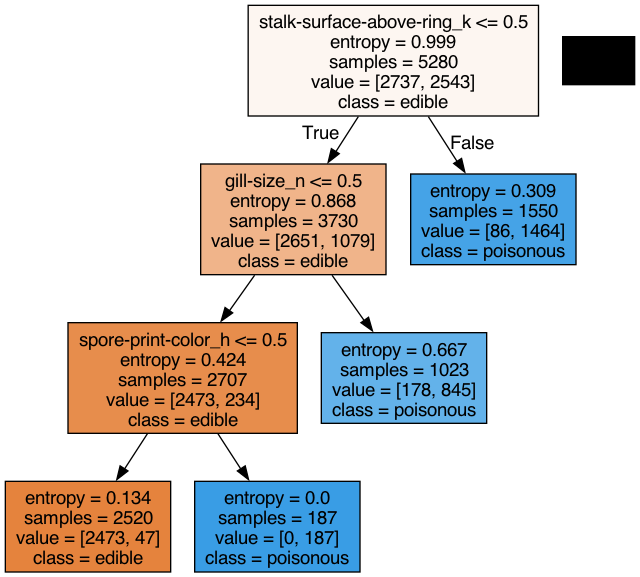

In [41]:
# Draw the decision tree based on the best parameter combination
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                       min_impurity_decrease=0.1, min_samples_leaf=1)
dt_classifier.fit(X_train, y_train)

# Get the textual representation of the Decision Tree rules
tree_rules = export_text(dt_classifier, feature_names=list(X_train.columns))
print(tree_rules)

# Visualize the decision tree using pydot
dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=list(X_train.columns),
                           class_names=['edible', 'poisonous'], filled=True)
graph = pydot.graph_from_dot_data(dot_data)

# Render the Decision Tree in Jupyter Notebook
Image(graph[0].create_png())


- ## Rules formed - 
- ##### If stalk-surface-above-ring_k <= 0.50 and gill-size_n <= 0.50 and spore-print-color_h <= 0.50, then the mushroom is Edible.
- ##### If stalk-surface-above-ring_k <= 0.50 and gill-size_n <= 0.50 and spore-print-color_h > 0.50, then the mushroom is Poisonous.
- ##### If stalk-surface-above-ring_k <= 0.50 and gill-size_n > 0.50, then the mushroom is Poisonous.
- ##### If stalk-surface-above-ring_k > 0.50, then the mushroom is Poisonous.

- ## Answer 3

- ### Note - Using the train.csv for our entire Train and Test as it is mentioned in the questions to split the dataset into Train 65% and Test 35%

- #### K = 1, 3, 5, 7, 9, 11, 13, 15 Finding Optimal K

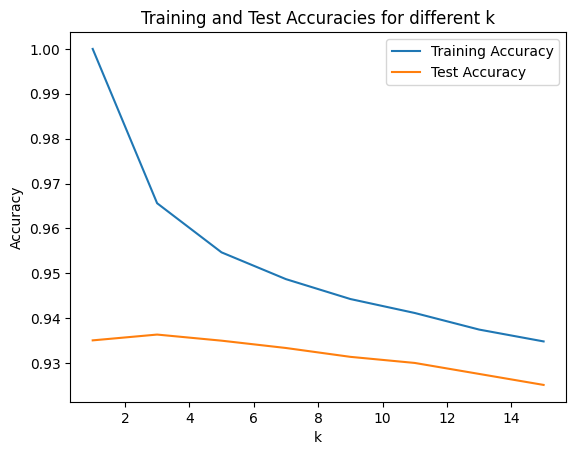

   k-values  Training Accuracy  Test Accuracy
0         1           1.000000       0.935034
1         3           0.965604       0.936327
2         5           0.954652       0.934966
3         7           0.948681       0.933333
4         9           0.944249       0.931361
5        11           0.941136       0.930000
6        13           0.937436       0.927551
7        15           0.934799       0.925102
Optimal k: 3


In [46]:
#Importing necesaary library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('train.csv')

# Separate features and labels
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

#Using StandardScaler to scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.35, random_state=42)

# Define different values of k
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Lists to store training and test accuracies for each k
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
for k in k_values:
    # Create an instance of the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_accuracy = knn.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate test accuracy
    test_accuracy = knn.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plot the training and test accuracies
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for different k')
plt.legend()
plt.show()

results_df = pd.DataFrame({
    'k-values': k_values,
    'Training Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Print the DataFrame
print(results_df)

# Find the optimal k
optimal_k = k_values[test_accuracies.index(max(test_accuracies))]
print('Optimal k:', optimal_k)


### K NN Classifier
- #### For Training data as per the graph shown the value of K in KNN is 1 then the accuracy is 100 % accurate and  increasing the value of K is decreasing the accuracy. 
- #### For test Data as per the graph shown As the value of K in KNN is increasing the accuracy on Test increased till K as 3 and then started decreasing. 
- #### So the Optimal Value of k is 3 and each test sample is assigned the label of its nearest 3 neighbor in the training set sample. 
- #### This means that with 3 neigbours the predictions are more accurate then 1 neighbour.

- ## Answer 4

In [43]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [45]:
#Importing necessary to library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv('train.csv')

# Separate features and labels
features = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

#Using StandardScaler to scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply 9-dimensional PCA
pca = PCA(n_components=9)
pca_features = pca.fit_transform(scaled_features)

# Apply 9-dimensional FISHER 
fld = LinearDiscriminantAnalysis(n_components=9)
fld_features = fld.fit_transform(scaled_features, labels)

# Split the data into training and test sets - Divide the data into 65% training and 35% test (after projection).
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_features, labels, test_size=0.35, random_state=42)
fld_X_train, fld_X_test, fld_y_train, fld_y_test = train_test_split(fld_features, labels, test_size=0.35, random_state=42)

# Decision Tree classifier with depth 5, purity threshold 0.8 for PCA so impurity is 0.2
pca_dt_classifier = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.2)
pca_dt_classifier.fit(pca_X_train, pca_y_train)
pca_train_accuracy = accuracy_score(pca_y_train, pca_dt_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score(pca_y_test, pca_dt_classifier.predict(pca_X_test))

# Decision Tree classifier with depth 5, purity threshold 0.8 for Fisher so impurity is 0.2
fld_dt_classifier = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.2)
fld_dt_classifier.fit(fld_X_train, fld_y_train)
fld_train_accuracy = accuracy_score(fld_y_train, fld_dt_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score(fld_y_test, fld_dt_classifier.predict(fld_X_test))

print("Digits-PCA-Tree Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-Tree Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)

# Build KNN classifiers
k = 5

#Digits-PCA-KNN classifier
pca_knn_classifier = KNeighborsClassifier(n_neighbors=k)
pca_knn_classifier.fit(pca_X_train, pca_y_train)
pca_train_accuracy = accuracy_score(pca_y_train, pca_knn_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score(pca_y_test, pca_knn_classifier.predict(pca_X_test))

#Digits-Fisher-KNN classifier
fld_knn_classifier = KNeighborsClassifier(n_neighbors=k)
fld_knn_classifier.fit(fld_X_train, fld_y_train)
fld_train_accuracy = accuracy_score(fld_y_train, fld_knn_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score(fld_y_test, fld_knn_classifier.predict(fld_X_test))

print("\nDigits-PCA-KNN Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-KNN Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)

# Build Logistic Regression classifiers
class_pair = (0, 3)

#Digits-PCA-Logistic-Regression classifier
pca_lr_classifier = LogisticRegression()
pca_lr_classifier.fit(pca_X_train, (pca_y_train == class_pair[0]))
pca_train_accuracy = accuracy_score((pca_y_train == class_pair[0]), pca_lr_classifier.predict(pca_X_train))
pca_test_accuracy = accuracy_score((pca_y_test == class_pair[0]), pca_lr_classifier.predict(pca_X_test))

#Digits-Fisher-Logistic-Regression classifier
fld_lr_classifier = LogisticRegression()
fld_lr_classifier.fit(fld_X_train, (fld_y_train == class_pair[0]))
fld_train_accuracy = accuracy_score((fld_y_train == class_pair[0]), fld_lr_classifier.predict(fld_X_train))
fld_test_accuracy = accuracy_score((fld_y_test == class_pair[0]), fld_lr_classifier.predict(fld_X_test))

print("\nDigits-PCA-Logistic-Regression Classifier:")
print("Train Accuracy:", pca_train_accuracy)
print("Test Accuracy:", pca_test_accuracy)

print("\nDigits-FISHER-Logistic-Regression Classifier:")
print("Train Accuracy:", fld_train_accuracy)
print("Test Accuracy:", fld_test_accuracy)


Digits-PCA-Tree Classifier:
Train Accuracy: 0.11263736263736264
Test Accuracy: 0.10945578231292517

Digits-FISHER-Tree Classifier:
Train Accuracy: 0.11263736263736264
Test Accuracy: 0.10945578231292517

Digits-PCA-KNN Classifier:
Train Accuracy: 0.9150915750915751
Test Accuracy: 0.8817687074829932

Digits-FISHER-KNN Classifier:
Train Accuracy: 0.9365567765567766
Test Accuracy: 0.9181632653061225

Digits-PCA-Logistic-Regression Classifier:
Train Accuracy: 0.9605494505494505
Test Accuracy: 0.9623129251700681

Digits-FISHER-Logistic-Regression Classifier:
Train Accuracy: 0.9872161172161172
Test Accuracy: 0.9878911564625851


- ##### PCA vs. Fisher for Tree Classifier:

The accuracy scores for both PCA and Fisher projections with the Tree Classifier are very low and nearly identical for both training and test data. This suggests that the Tree Classifier is not well-suited for either PCA or Fisher-transformed features. Decision Trees might not be able to capture the complex patterns and relationships present in the high-dimensional data space.

- ##### PCA vs. Fisher for kNN Classifier:

Both PCA and Fisher projections perform significantly better with the kNN Classifier compared to the Tree Classifier. The test accuracy of the Fisher-transformed features is 91.8% higher than PCA-transformed features which is 88.17%.
kNN is a non-linear model and can better utilize the informative features generated by Fisher Discriminant Analysis (FDA), which are specifically designed to maximize class separation.

- ##### PCA vs. Fisher for Logistic Regression Classifier:

Both PCA and Fisher transformations work very well with the Logistic Regression Classifier. However, the accuracy of Fisher-transformed features is higher which is 98.7% , indicating that Fisher features capture more discriminative information for logistic regression.

- ##### Conclusion

The effectiveness of PCA vs. Fisher transformation is determined by the classifier utilized. Fisher transformation frequently outperforms PCA for linear models such as Logistic Regression because it maximizes class separation. Fisher transformation can still be effective for non-linear models like kNN, but its superiority over PCA may not be as evident. Neither PCA nor Fisher transformation appear to be useful for decision tree-based classifiers, most likely due to decision trees' difficulties in dealing with high-dimensional data.
